### 引言

本教程的目的是引导你入门Matplotlib。在教程开始之前，首先简单回答两个问题：什么是Matplotlib？我们为什么要学习Matplotlib？Matplotlib是一个Python绘图库，是最常用的Python绘图库（或许没有之一）。Matplotlib是可视化的利器，掌握了它，你可以用清晰直观的图形来将你的数据展现出来，也可以用不同的方式和风格展示导入或者生成的图片；Matplotlib也是相对简单易用的。简单又强大的Matplotlib值得我们稍花精力学习。

我们开始吧。首先导入绘图库matplotlib和数值计算模块numpy。

In [25]:
import matplotlib as mpl
#注意在此之前你应该已经安装了matplotlib包。安装方法见前面的教程。
from matplotlib import pyplot as plt
#pyplot是matplotlib的子库，大多数绘图都需要pyplot。
import matplotlib.image as mpimg
#在这个教程中mpimg用于读取图片
import numpy as np

### 简单例子和一个Figure的各个部分

我们先以二维图像的绘制为例进行介绍，下面是一个最简单的例子。

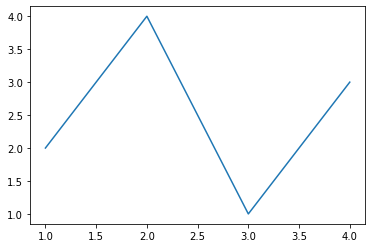

In [26]:
fig, ax = plt.subplots() 
ax.plot([1,2,3,4], [2,4,1,3]); 

Matplotlib将你的数据绘制在$\textbf{Figure}$上。每个Figure可以包含一个或多个$\textbf{Axes}$，Axes是一个可以指定x-y坐标的区域。创建带有坐标轴的图的最简单方法是使用pyplot.subplots。然后我们可以使用Axes.plot在坐标轴上绘制一些数据，也就是像上面的例子那样。注意不要混淆Axes和Axis。前者是一个可以指定x-y坐标的区域，后者指的是一个坐标轴。

一张Figure除了Axes，还包含哪些部分呢？如何操作这些部分？下面的图展示了Figure每个部分的名字和操作它们需要用到的函数。

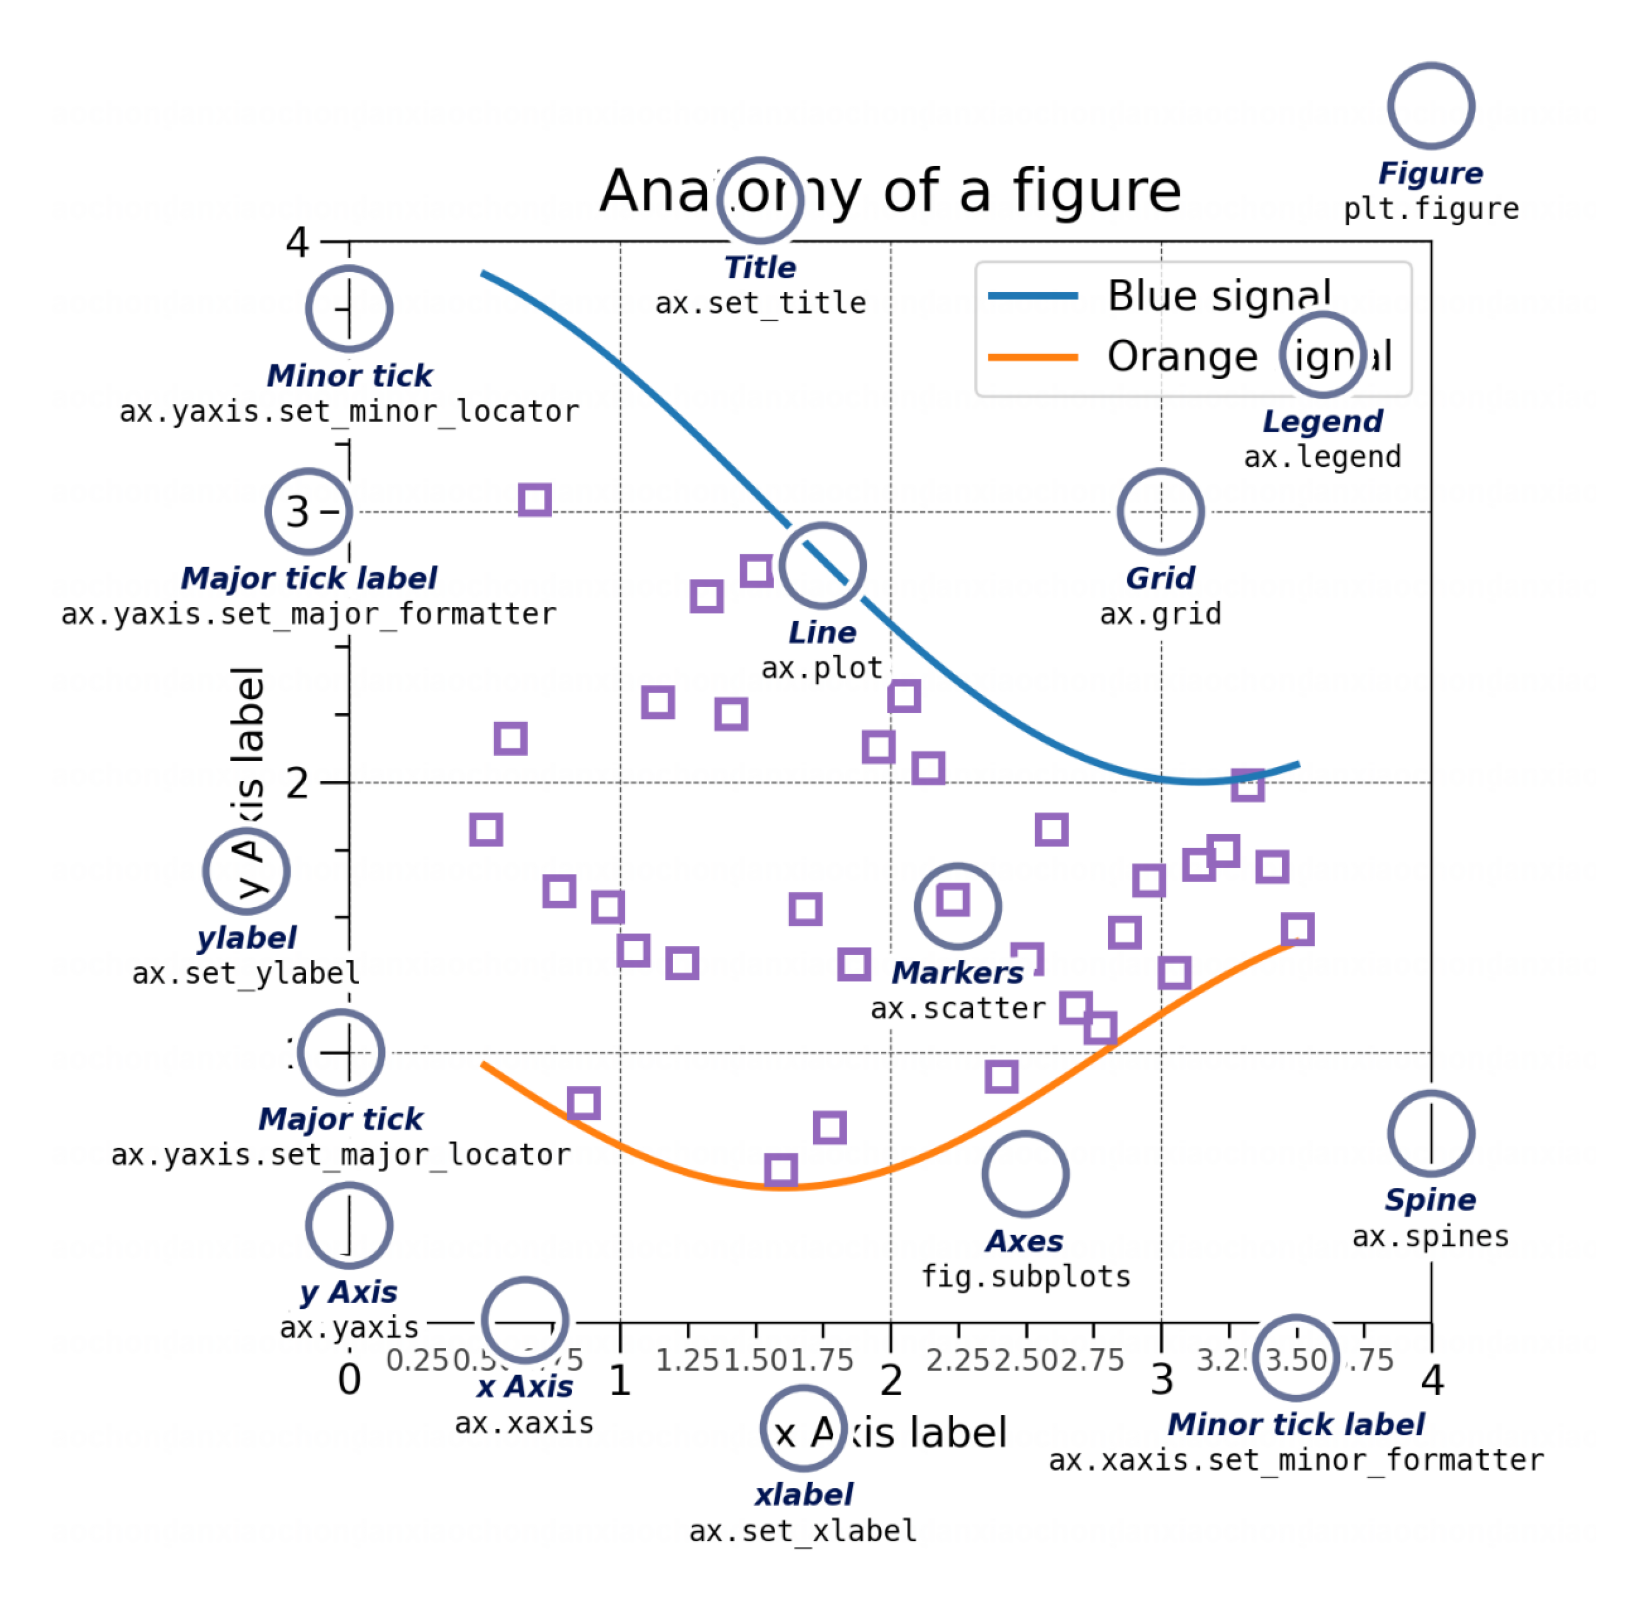

In [27]:
mpl.rcParams['figure.dpi'] = 500#设置输出图片的dpi。dpi设置为500主要是为了显示清晰的png格式文件
PartsofFigure = mpimg.imread('Figure的各个部分.PNG')
plt.axis('off')
plt.figsize=(30, 30)
plt.imshow(PartsofFigure)
plt.show()

再次说明一些概念：我们把整张图叫做$\textbf{Figure}$。一个Figure中包含一个或者多个$\textbf{Axes}$。Axes是一个用于绘制数据的区域，包含两个Axis（x轴和y轴）。每个Axes有一个标题（通过set_title()设置），一个x轴标签（通过set_xlabel()设置）和一个Y轴标签（通过set_ylabel()设置）。大部分的绘图方法被定义在Axes类和它的成员函数上面。常用的成员函数有set_title(), legend(), set_ylabel(), set_xlabel(), xaxis(), yaxis(), plot(), scatter()这些。下面的教程将继续举绘图例子，例子中会用到这些函数中的大多数。

### 绘制曲线

首先准备数据。matplotlib的绘图函数可以接受numpy.array格式的数据,或者是可以被numpy.asarray转为numpy.array的数据（例如list,tuple,pandas.Series等等，简而言之就是类似一维数组的一列数）。

In [28]:
x=np.linspace(0,2*np.pi,500)
y1=np.sin(x)
y2=np.cos(x)
y3=x
y4=x**(1/2)

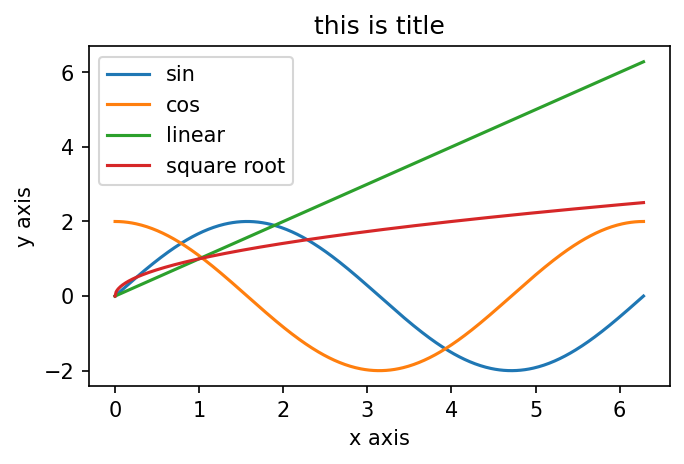

In [29]:
mpl.rcParams['figure.dpi'] = 150
fig,ax=plt.subplots(figsize=(5,3)) #生成figure和它包含的唯一axes
#fig是Figure对象的实例，ax是Axes对象的实例
#接下来我们对ax操作
ax.plot(x,2*y1,label='sin') #在ax中添加sin曲线，设置label为sin
ax.plot(x,2*y2,label='cos') #添加cos曲线
ax.plot(x,y3,label='linear')
ax.plot(x,y4,label='square root')
#ax.plot()函数会根据你输入的数据生成曲线。
#第一个输入是曲线上点们的横坐标，第二个输入是曲线上点们的纵坐标。
#label是曲线的标签，用于后续生成标注。
ax.set_xlabel('x axis') #设置横轴名称
ax.set_ylabel('y axis') #设置纵轴名称
ax.set_title('this is title') #设置标题
ax.legend() #显示标注

我们可以选择曲线的风格。下面是例子。

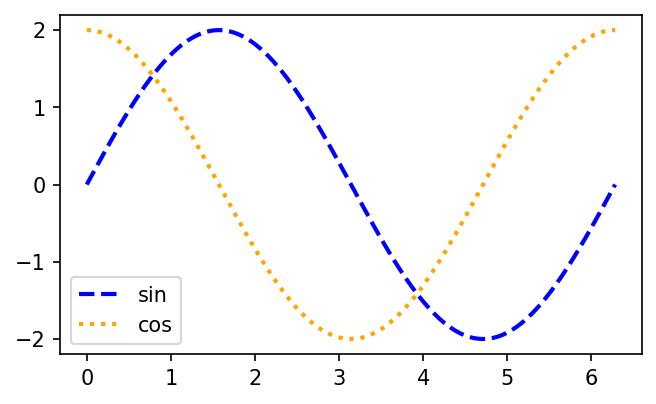

In [30]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, 2*y1, color='blue', linewidth=2, linestyle='--',label='sin')
l, = ax.plot(x, 2*y2 , color='orange', linewidth=2,label='cos') #l是曲线对象
l.set_linestyle(':'); #曲线的风格可以在调用绘制函数时设置，也可以后续设置或修改。
#曲线是一种Artist，Figure上任意可见的部分都是一个Artist。
#所有Artist的样式都可以在调用绘制函数时设置，也可以后续设置或修改。
ax.legend()

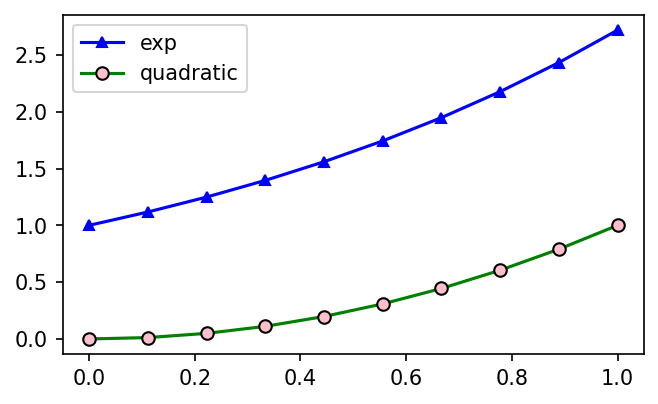

In [31]:
x=np.linspace(0,1,10)
y1=np.exp(x)
y2=x**2
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x,y1,color='blue',marker='^',markersize='5',label='exp')
ax.plot(x,y2,color='green',marker='o',markersize='6',markeredgecolor='black',markeredgewidth=1,markerfacecolor='pink',label='quadratic')
ax.legend()

Text(0, 0.5, 'this is y')

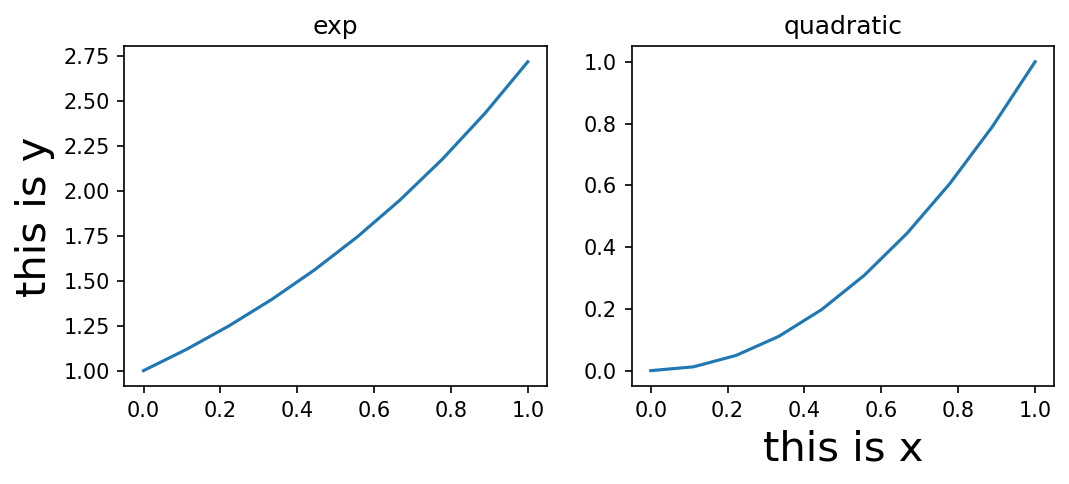

In [32]:
#一张Figure中包含多个Axes
fig, axs = plt.subplots(1,2,figsize=(8, 3))
axs[0].plot(x,y1)
axs[1].plot(x,y2)
#多个Axes可以分别操作
axs[0].set_title('exp')
axs[1].set_title('quadratic')
axs[1].set_xlabel('this is x',size=20)
axs[0].set_ylabel('this is y',size=20)

看到这里我们来复习接触过的函数和功能：  
plt.subplots()可以用来生成figure和axes。  
ax是Axes的实例，则ax.plot()可以用来绘制曲线。ax.plot()有丰富的可自定义风格选项，通过函数参数来选择。  
ax.set_title()用来设置图题  
ax.set_xlabel(), ax.set_ylabel()用来设置x轴和y轴的标签。  
ax.legend()用来显示曲线的标签。  
掌握了这些函数你已经能绘制出漂亮的曲线了。接下来我们的节奏会快一些。

### 绘制散点图

In [33]:
x=np.random.randn(100)
y=np.random.randn(100)

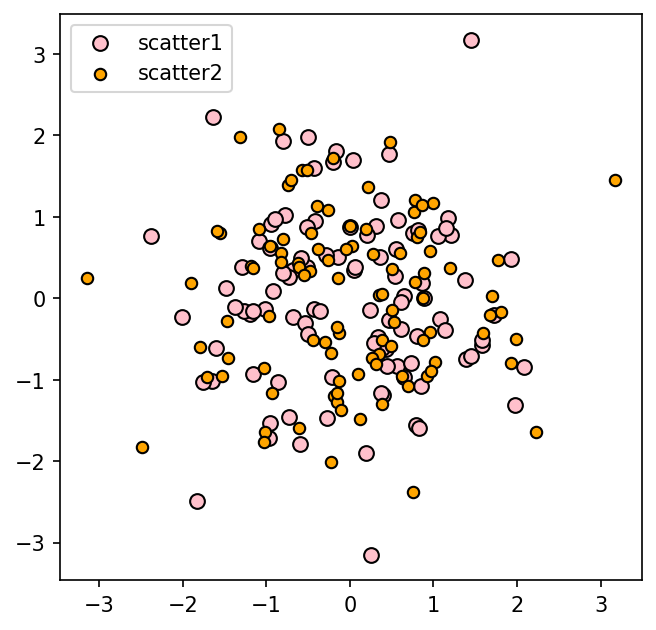

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x, y, s=50, facecolor='pink', edgecolor='black',label='scatter1') #ax.scatter函数用于绘制散点图
ax.scatter(y, x, s=30, facecolor='orange', edgecolor='black',label='scatter2')
ax.legend()

### 绘制直方图

In [35]:
#生成一组正态分布的数据
mu,sigma=0,10
x=mu+sigma*np.random.randn(20000)

Text(0.5, 1.0, 'Normal Distribution')

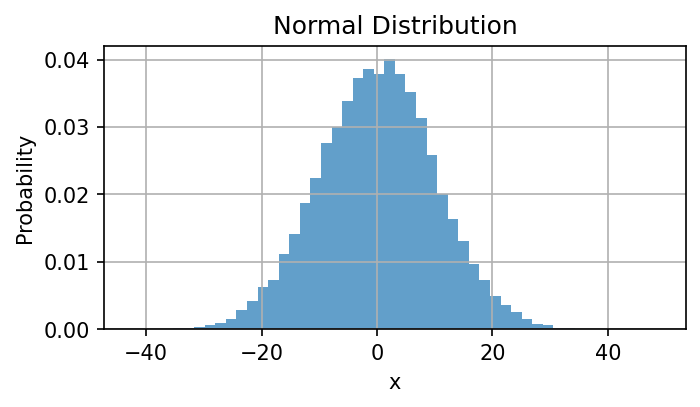

In [36]:
fig, ax = plt.subplots(figsize=(5,2.5))
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0',alpha=0.7)
#density=True时绘制频率，density=False时绘制频数
#第二个参数是分组个数
#alpha用来设置透明度
ax.grid() #生成网格
ax.set_xlabel('x')
ax.set_ylabel('Probability')
ax.set_title('Normal Distribution')

### 在matplotlib绘图中添加公式

Matplotlib接受TeX表达式。具体例子如下。

Text(0.5, 1.0, 'Normal Distribution of $\\mu$=0, $\\sigma$=10')

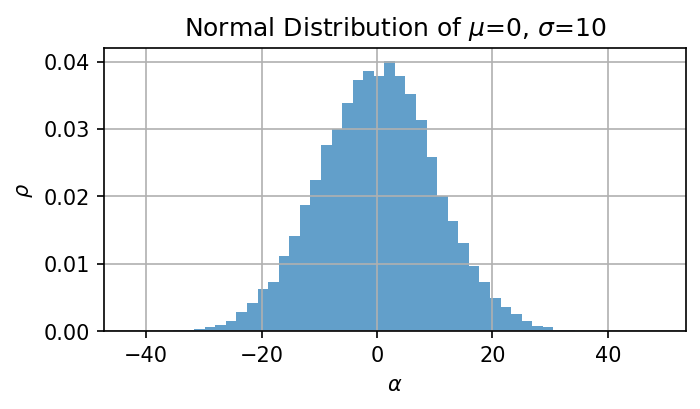

In [37]:
fig, ax = plt.subplots(figsize=(5,2.5))
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0',alpha=0.7)
#density=True时绘制频率，density=False时绘制频数
#第二个参数是分组个数
#alpha用来设置透明度
ax.grid()
ax.set_xlabel(r'$\alpha$') #只是为了示例，并无实际意义
ax.set_ylabel(r'$\rho$') #只是为了示例，并无实际意义
ax.set_title(r'Normal Distribution of $\mu$=0, $\sigma$=10')

字符串前面的r表示该字符串是raw字符串，而不是将反斜杠视为 python 转义。 Matplotlib 有一个内置的TeX表达式解析器和布局引擎，并提供自己的数学字体。

### 在图中添加文字和标注

Text(-43, 0.023, 'this is $\\mu$=0, $\\sigma$=10')

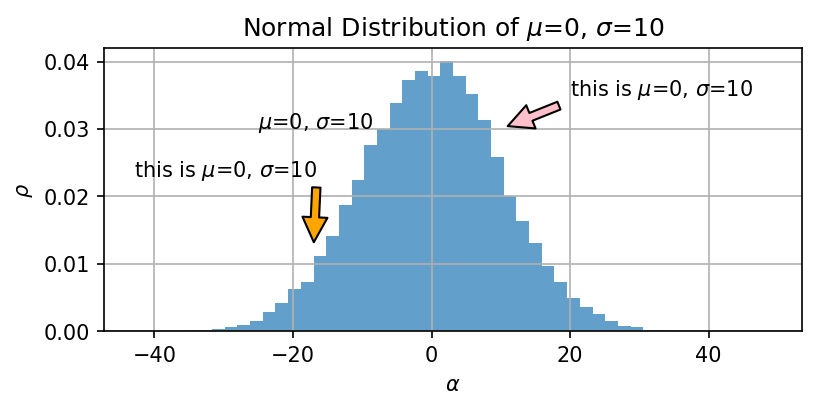

In [38]:
fig, ax = plt.subplots(figsize=(6,2.5))
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0',alpha=0.7)
#density=True时绘制频率，density=False时绘制频数
#第二个参数是分组个数
#alpha用来设置透明度
ax.grid() #生成网格
ax.set_xlabel(r'$\alpha$') #只是为了示例，并无实际意义
ax.set_ylabel(r'$\rho$') #只是为了示例，并无实际意义
ax.set_title(r'Normal Distribution of $\mu$=0, $\sigma$=10')
ax.text(-25,0.03, r'$\mu$=0, $\sigma$=10')
#第一个参数是横坐标，第二个参数是纵坐标，第三个参数是内容
ax.annotate(r'this is $\mu$=0, $\sigma$=10', xy=(10, 0.03), xytext=(20, 0.035),
            arrowprops=dict(facecolor='pink',edgecolor='black',shrink=0.1))
ax.annotate(r'this is $\mu$=0, $\sigma$=10', xy=(-17, 0.013), xytext=(-43,0.023),
            arrowprops=dict(facecolor='orange',edgecolor='black',shrink=0.02))
#第一个参数是标注文本，xy是箭头指向位置，xytext是标注文本位置，arrowprops是箭头的性质。

### 坐标轴设置

(-8.0, 8.0, -5.0, 30.0)

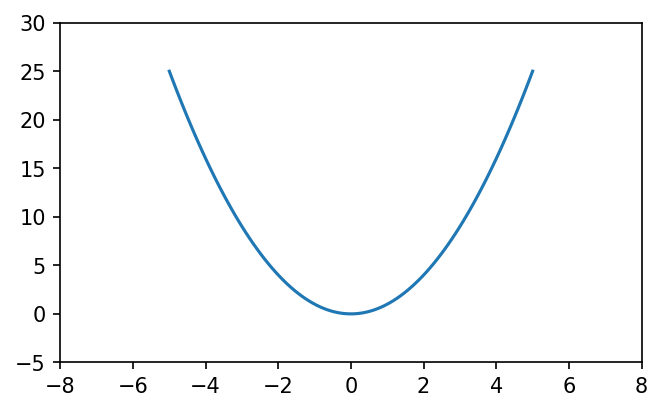

In [39]:
#设置坐标轴范围
x=np.linspace(-5,5,100)
y=x**2
fig,ax=plt.subplots(figsize=(5,3))
ax.plot(x,y)
ax.axis([-8,8,-5,30])
#参数是一个长度为4的列表，分别是横轴左右两端，纵轴下上两端。

(-5.0, 35.0)

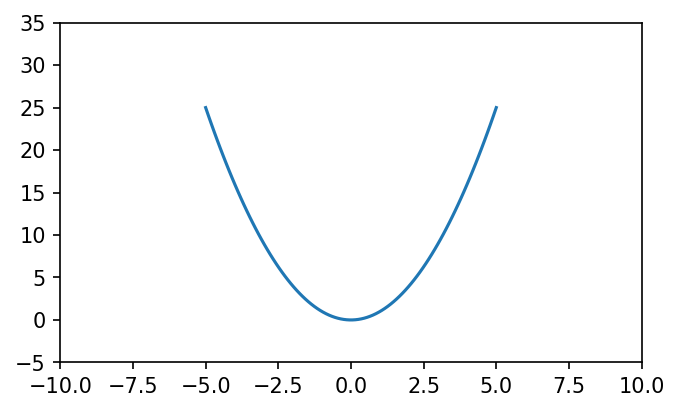

In [40]:
fig,ax=plt.subplots(figsize=(5,3))
ax.plot(x,y)
#可以分别设置x轴和y轴的范围
ax.set_xlim([-10,10])
ax.set_ylim([-5,35])

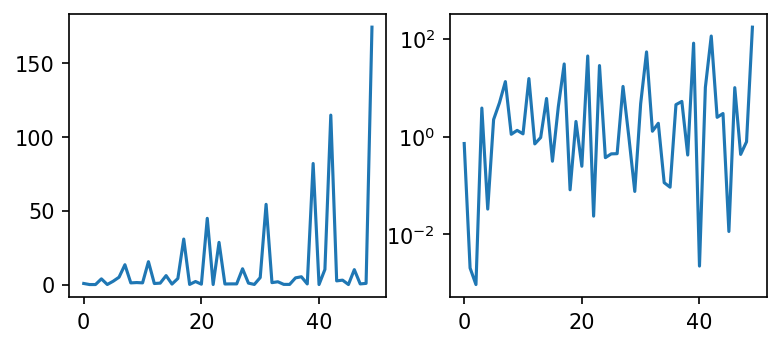

In [41]:
#使用非线性坐标轴
data=np.random.randn(50)
fig, axs = plt.subplots(1, 2, figsize=(6, 2.5))
x=np.arange(len(data))
y=10**data
axs[0].plot(x,y)
axs[1].set_yscale('log')
axs[1].plot(x,y)

Text(0.5, 0, 'Angle [°]')

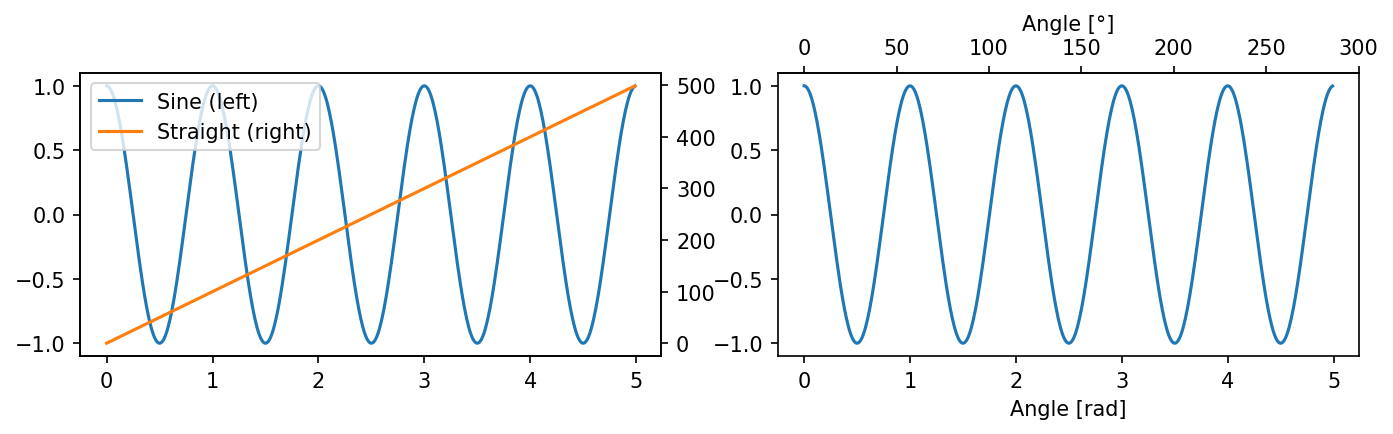

In [42]:
#绘制双坐标轴
#生成数据
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(11, 2.5))
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
#ax2的横坐标轴隐藏，纵坐标在右侧
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
#functions是上下横坐标对应的函数
ax4.set_xlabel('Angle [°]')

### Matplotlib的隐式接口

Matplotlib有两种编程风格。上面讲解的方法显式地创建Figure和Axes，并对它们调用方法。这是面向对象的编程方法。另一种方法是依靠pyplot来隐式地创建和管理Figure和Axes, 用pyplot中的函数来绘图。  
matplotlib.pyplot是一个函数集合，使matplotlib像MATLAB一样工作。每个pyplot函数都会对一个Figure进行一些改变：例如，创建Figure，绘制曲线，添加标签，等等。  
在matplotlib.pyplot中，各种状态在前后的函数调用中是保留的。绘图函数被指向当前的axes。  
隐式编程的代码量会相对少一些，尤其是对于简单的绘图任务来说；但是这种方式的灵活性比显式编程要低。我们可以按照需求选择编程风格。  
下面我们把用显式编程风格做过的事用隐式编程风格再做一遍。

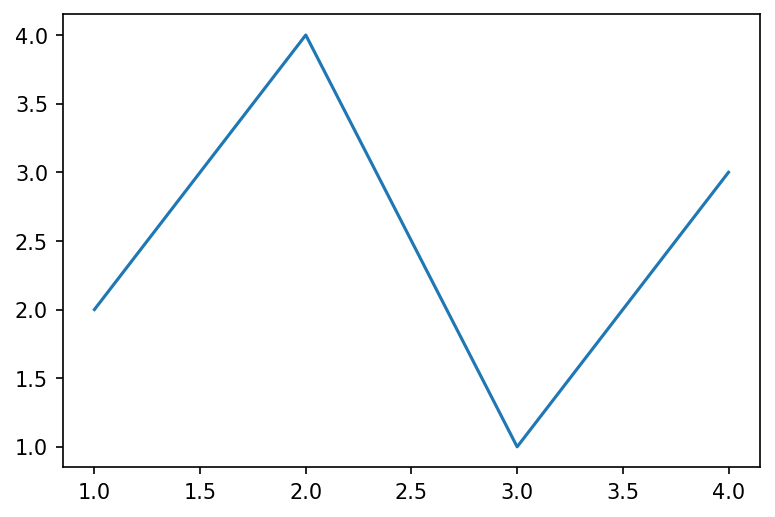

In [43]:
#简单例子
plt.plot([1,2,3,4],[2,4,1,3])
plt.show()

In [44]:
#准备数据
x=np.linspace(0,2*np.pi,500)
y1=np.sin(x)
y2=np.cos(x)
y3=x
y4=x**(1/2)

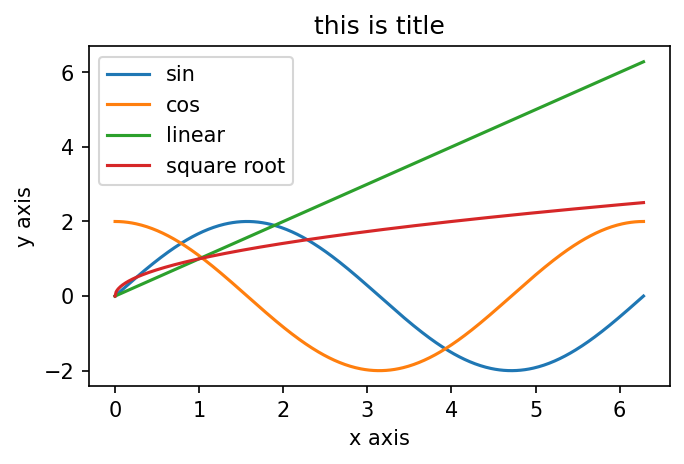

In [45]:
#绘制曲线
plt.figure(figsize=(5,3))
plt.plot(x,2*y1,x,2*y2,x,y3,x,y4)
plt.legend(['sin','cos','linear','square root'])
plt.xlabel('x axis')#设置横轴名称
plt.ylabel('y axis')#设置纵轴名称
plt.title('this is title')#设置标题
plt.show()

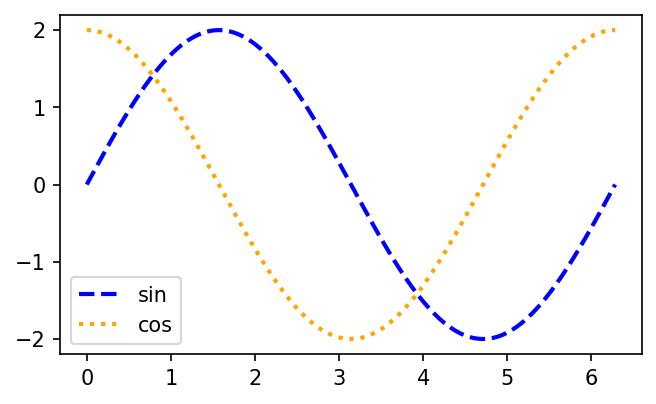

In [46]:
plt.figure(figsize=(5,3))
plt.plot(x, 2*y1, color='blue', linewidth=2, linestyle='--',label='sin')
plt.plot(x, 2*y2 , color='orange', linewidth=2, linestyle=':',label='cos')
plt.legend()
plt.show()

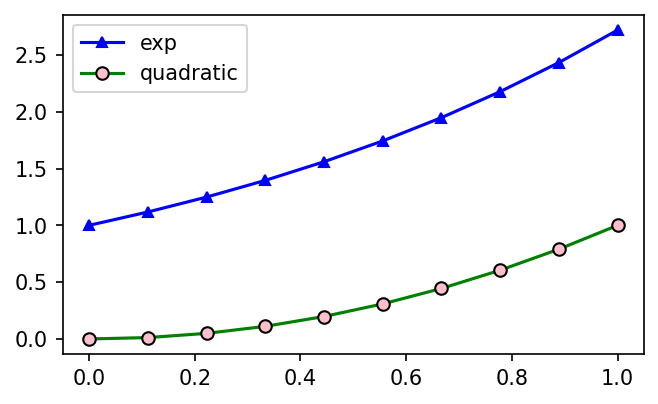

In [47]:
x=np.linspace(0,1,10)
y1=np.exp(x)
y2=x**2
plt.figure(figsize=(5,3))
plt.plot(x,y1,color='blue',marker='^',markersize='5',label='exp')
plt.plot(x,y2,color='green',marker='o',markersize='6',markeredgecolor='black',markeredgewidth=1,markerfacecolor='pink',label='quadratic')
plt.legend()
plt.show()

Text(0.5, 0, 'this is x')

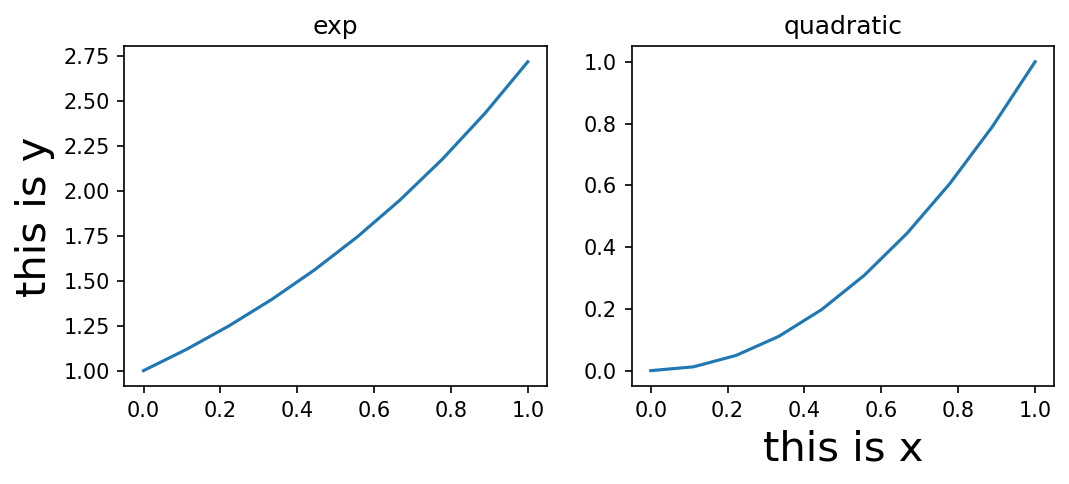

In [48]:
plt.figure(figsize=(8,3))
plt.subplot(121)
#subplot是一行两列，现在对第一个操作
plt.plot(x,y1)
plt.title('exp')
plt.ylabel('this is y',size=20)
plt.subplot(122)
#subplot是一行两列，现在对第二个操作
plt.plot(x,y2)
plt.title('quadratic')
plt.xlabel('this is x',size=20)

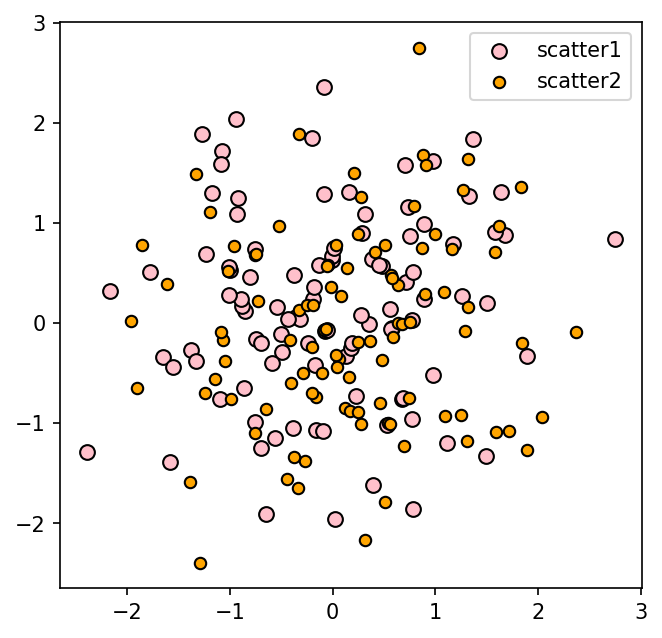

In [49]:
x=np.random.randn(100)
y=np.random.randn(100)
plt.figure(figsize=(5, 5))
plt.scatter(x, y, s=50, facecolor='pink', edgecolor='black',label='scatter1') 
plt.scatter(y, x, s=30, facecolor='orange', edgecolor='black',label='scatter2')
plt.legend()
plt.show()

In [50]:
#生成一组正态分布的数据
mu,sigma=0,10
x=mu+sigma*np.random.randn(20000)

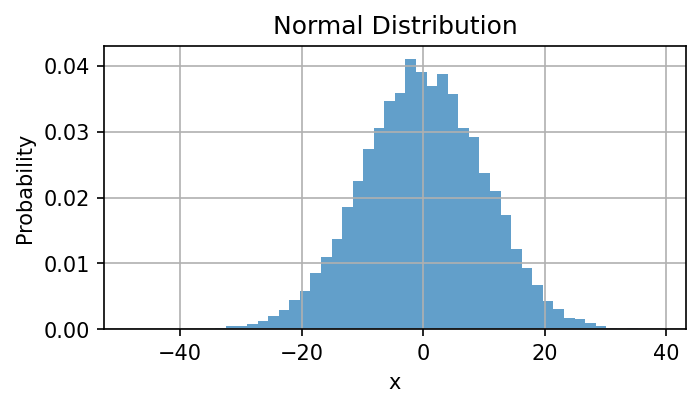

In [51]:
plt.figure(figsize=(5,2.5))
plt.hist(x, 50, density=True, facecolor='C0',alpha=0.7)
#density=True时绘制频率，density=False时绘制频数
#第二个参数是分组个数
#alpha用来设置透明度
plt.grid() #生成网格
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

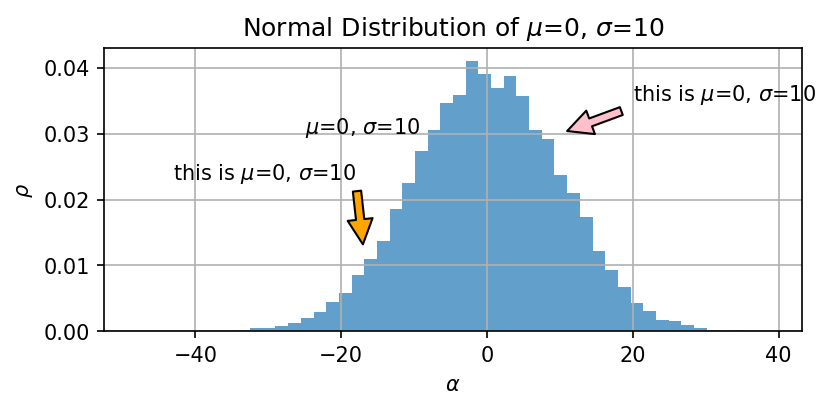

In [52]:
plt.figure(figsize=(6,2.5))
plt.hist(x, 50, density=True, facecolor='C0',alpha=0.7)
#density=True时绘制频率，density=False时绘制频数
#第二个参数是分组个数
#alpha用来设置透明度
plt.grid() #生成网格
plt.xlabel(r'$\alpha$') #只是为了示例，并无实际意义
plt.ylabel(r'$\rho$') #只是为了示例，并无实际意义
plt.title(r'Normal Distribution of $\mu$=0, $\sigma$=10')
plt.text(-25,0.03, r'$\mu$=0, $\sigma$=10')
#第一个参数是横坐标，第二个参数是纵坐标，第三个参数是内容
plt.annotate(r'this is $\mu$=0, $\sigma$=10', xy=(10, 0.03), xytext=(20, 0.035),
            arrowprops=dict(facecolor='pink',edgecolor='black',shrink=0.1))
plt.annotate(r'this is $\mu$=0, $\sigma$=10', xy=(-17, 0.013), xytext=(-43,0.023),
            arrowprops=dict(facecolor='orange',edgecolor='black',shrink=0.02))
#第一个参数是标注文本，xy是箭头指向位置，xytext是标注文本位置，arrowprops是箭头的性质。
plt.show()

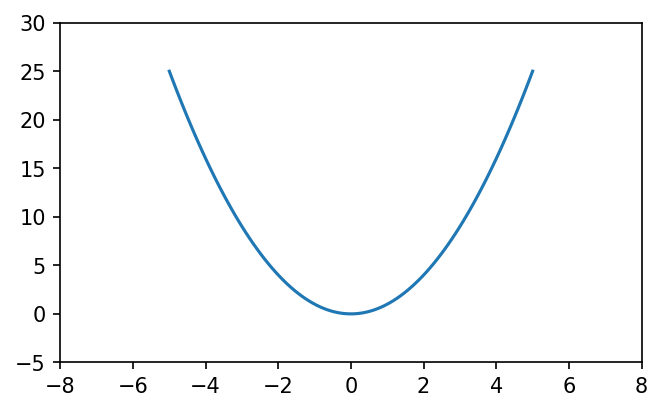

In [53]:
#设置坐标轴范围
x=np.linspace(-5,5,100)
y=x**2
plt.figure(figsize=(5,3))
plt.plot(x,y)
plt.axis([-8,8,-5,30])
plt.show()
#参数是一个长度为4的列表，分别是横轴左右两端，纵轴下上两端。

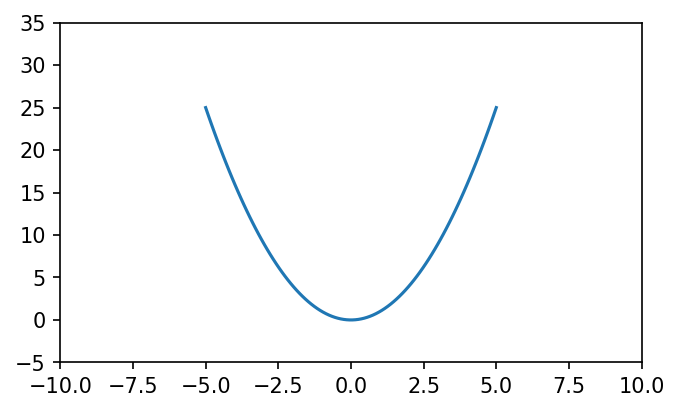

In [54]:
plt.figure(figsize=(5,3))
plt.plot(x,y)
#可以分别设置x轴和y轴的范围
plt.xlim([-10,10])
plt.ylim([-5,35])
plt.show()

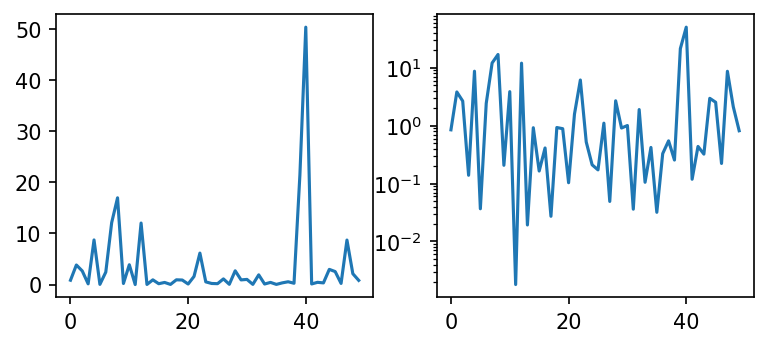

In [55]:
#使用非线性坐标轴
data=np.random.randn(50)
x=np.arange(len(data))
y=10**data

plt.figure(figsize=(6, 2.5))
plt.subplot(121)
plt.plot(x,y)
plt.subplot(122)
plt.yscale('log')
plt.plot(x,y)
plt.show()

上面这些是用pyplot隐式编程风格绘图的例子。下面是这个教程的最后一部分：使用matplotlib保存、读取、展示图片。

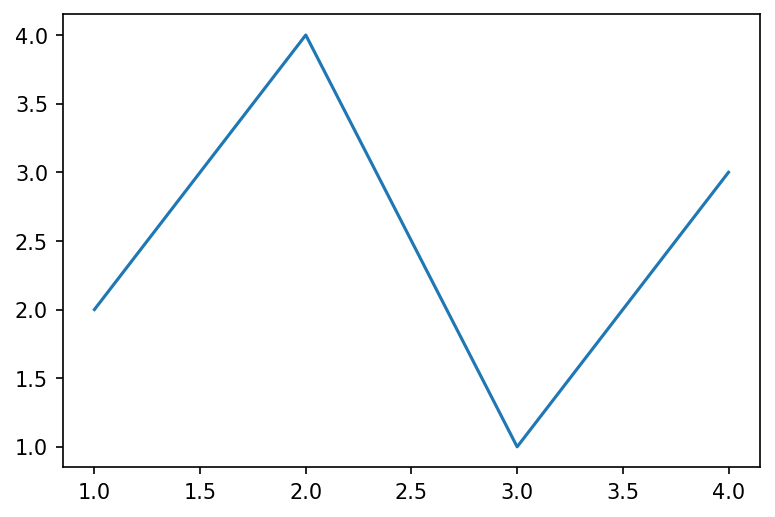

In [56]:
#保存图片
fig, ax = plt.subplots() 
ax.plot([1,2,3,4],[2,4,1,3]); 
#无论前面用显式还是隐式的方式绘图，都可以用plt.savefig()函数保存。
plt.savefig('test.png')

In [57]:
#读取图片
test=mpimg.imread('test.png')

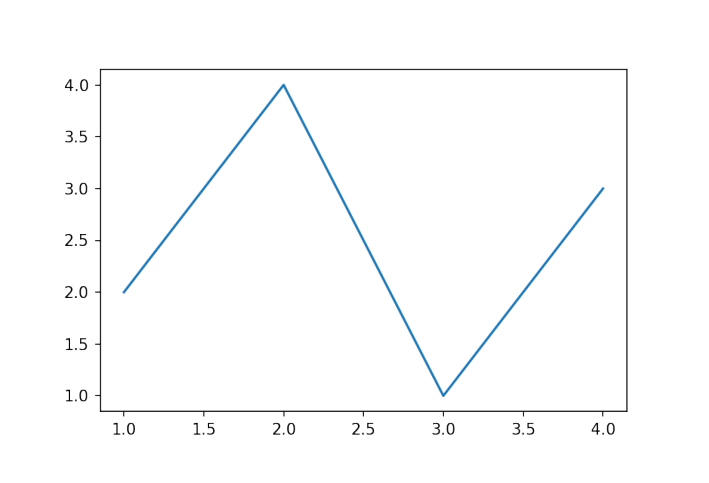

In [58]:
#展示图片
fig,ax=plt.subplots()
ax.axis('off')
ax.imshow(test)

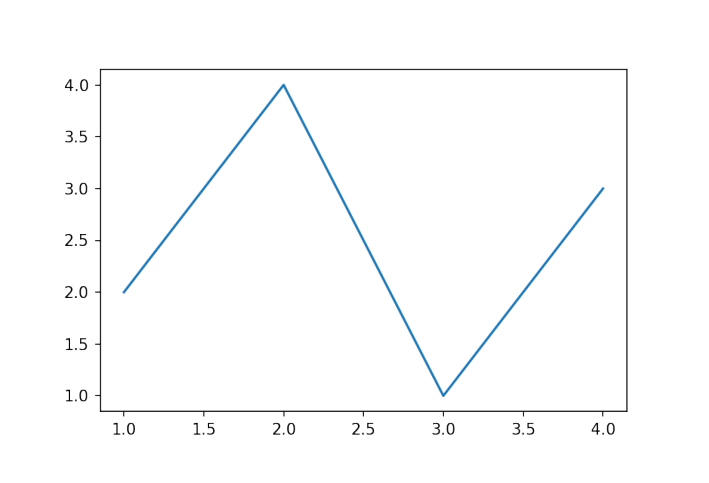

In [59]:
#展示图片
plt.axis('off')
plt.imshow(test)
plt.show()

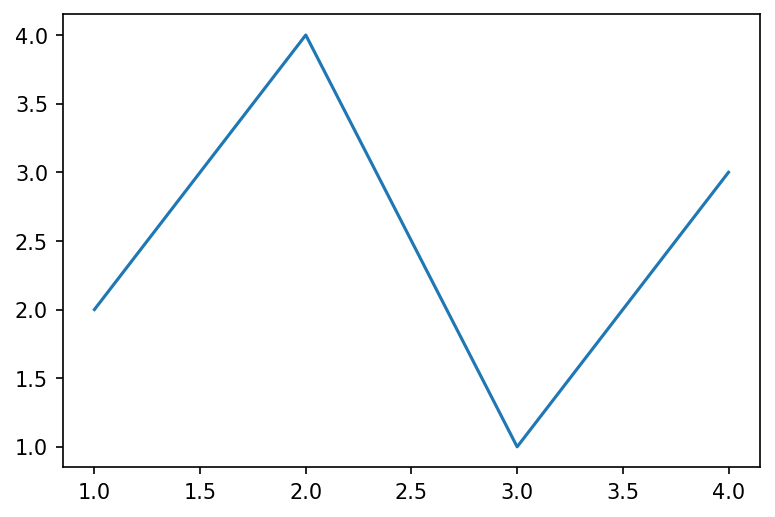

In [60]:
#可以保存为pdf格式的矢量图，并且指定dpi
fig, ax = plt.subplots() 
ax.plot([1,2,3,4],[2,4,1,3]); 
#无论前面用显式还是隐式的方式绘图，都可以用plt.savefig()函数保存。
plt.savefig('test.pdf',dpi=1000)

### 三维图像的绘制

上面的章节介绍了二维图像的绘制。在实际应用中，为了实现三维数据可视化，我们有时还需要描绘一些三维图像，这也可以借助Matplotlib完成。下面是一些实例，可以与二维情况做比较。

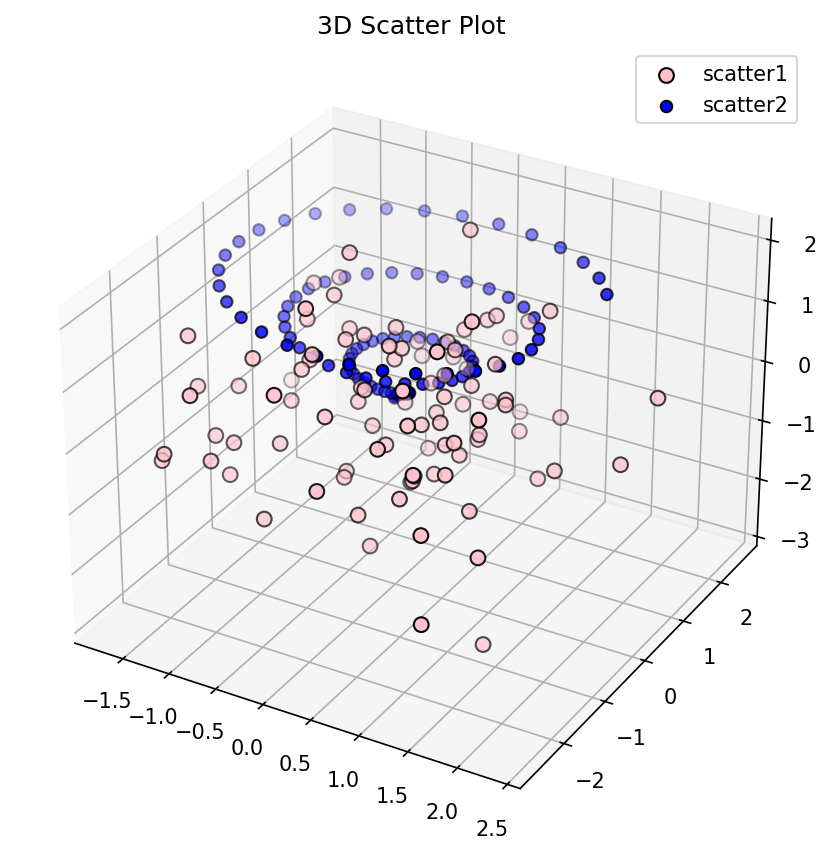

In [63]:
#三维散点图
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d') #设置三维的axes
x=np.random.randn(100)
y=np.random.randn(100)
z=np.random.randn(100)
u=np.linspace(0, 2, 100)
v= u * np.sin(10 * u)
w= u * np.cos(10 * u)
ax.scatter3D(x, y, z, s=50, facecolor='pink', edgecolor='black',label='scatter1') #利用scatter3D函数绘制三维散点图
ax.scatter3D(v, w, u, s=30, facecolor='blue', edgecolor='black',label='scatter2')
ax.set_title('3D Scatter Plot')
ax.legend()

Text(0.5, 0.92, '3D Surface')

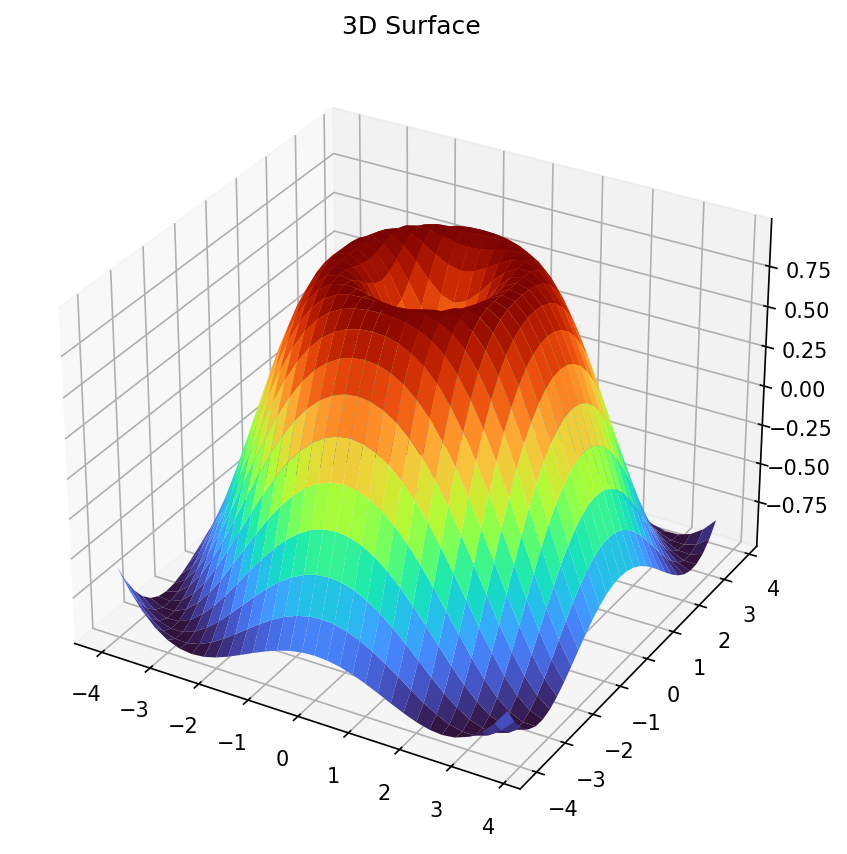

In [65]:
#三维曲面
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
x = np.arange(-4, 4, 0.25)
y = np.arange(-4, 4, 0.25)
x, y = np.meshgrid(x, y) #生成网格
r = np.sqrt(x**2 + y**2)
z = np.sin(r)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='turbo') #利用plot_surface函数绘制三维曲面
#rstride,cstride分别决定行、列网格的单位跨度，cmap决定曲面色调
ax.set_title('3D Surface')

本教程到这里就结束了，希望大家能有所收获。下面列出一些更详细的参考资料，供大家进一步阅读学习：

https://www.cainiaojc.com/matplotlib/matplotlib-tutorial.html

https://www.runoob.com/w3cnote/matplotlib-tutorial.html